<a href="https://colab.research.google.com/github/ThiagoVisentimLopes/DataScience/blob/master/TCC02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alguns itens que precisam ser trabalhados:


1.   Na coluna "CFOP", precisamos pegar apenas o primeiro dígito da string, Exemplo: o CFOP 6056 irá virar 6.
2.   Na coluna "SITUA. NF.", as situações precisam ser transformadas como foi feito com a coluna "TIPO DE USO".
3.   Precisamos fazer plots com "CFOP"
4.   Precisamos fazer plots combinando "SITUA. NF."



10.   Precisamos fazer plots combinando "DESTINO" (se sobrar tempo), a idéia é:
*   compreender quem são os clientes que mais compram.
*   quais itens estão comprando.
*   As vendas estão sendo para dentro,fora do estado ou para o exterior.(Para esse plot precisamos combinar a CFOP).










In [346]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Etapa 1 - Realizaremos a primeira etapa do Processo KDD, onde será realizado:

*   Leitura do DataFrame com todas as variavéis e amostras brutas.
*   Seleção das variáveis que desejamos e criação de DataFrames menores (facilitando assim a manipulação e visualização).



In [347]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [406]:
grossDF = pd.read_csv('/content/drive/My Drive/TCC/BaseRotulada.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (54,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Consideração importantes sobre alguns campos:


* **KEY**: É composto por, Empresa, Série e Número do pedido, separados por ';'
* **PRECO UNIT.**: Preço unitário do item, por quanto foi vendido.
* **PRECO CUSTO**: Preço de custo do item, por quanto foi comprado do fornecedor.

---

* **CFOP**(Segundo o site do Sefaz):

*ENTRADA*

1.000 – ENTRADA E/OU AQUISIÇÕES DE SERVIÇOS DO ESTADO  

2.000 – ENTRADA E/OU AQUISIÇÕES DE SERVIÇOS DE OUTROS ESTADOS

3.000 – ENTRADA E/OU AQUISIÇÕES DE SERVIÇOS DO EXTERIOR

*SAÍDAS*      
                                                                      5.000 - SAÍDAS OU PRESTAÇÕES DE SERVIÇOS PARA O ESTADO

6.000 - SAÍDAS OU PRESTAÇÕES DE SERVIÇOS PARA OUTROS ESTADOS

7.000 - SAÍDAS OU PRESTAÇÕES DE SERVIÇOS PARA O EXTERIOR









In [407]:
#KEY, é composto por, Empresa, Série e Número do pedido, separados por ';'

grossDF = grossDF[['KEY', 'DATA EMISSAO', 'CÓD. MAT','QTD.','PRECO UNIT.','PRECO CUSTO','TOTAL DO ITEM','CFOP','SITUA. NF.','DESTINO','VENDEDOR','TIPO DE USO']]

Método para se transformar string em valor numérico.

In [408]:
grossDF = grossDF.replace(to_replace=["Emitida"],
           value="1")
grossDF = grossDF.replace(to_replace=["Cancelada"],
           value="2")
grossDF = grossDF.replace(to_replace=["Pendente"],
           value="3")

In [409]:
grossDF = grossDF.replace(to_replace=["Consumo"],
           value="1")
grossDF = grossDF.replace(to_replace=["Industrialização"],
           value="2")
grossDF = grossDF.replace(to_replace=["Revenda"],
           value="3")

In [ ]:
grossDF

In [352]:
grossDF['SITUA. NF.'].value_counts()

Emitida      40308
Cancelada     1050
Pendente         1
Name: SITUA. NF., dtype: int64

In [353]:
#sns.pairplot(grossDF,hue='TIPO DE USO',palette='bwr')

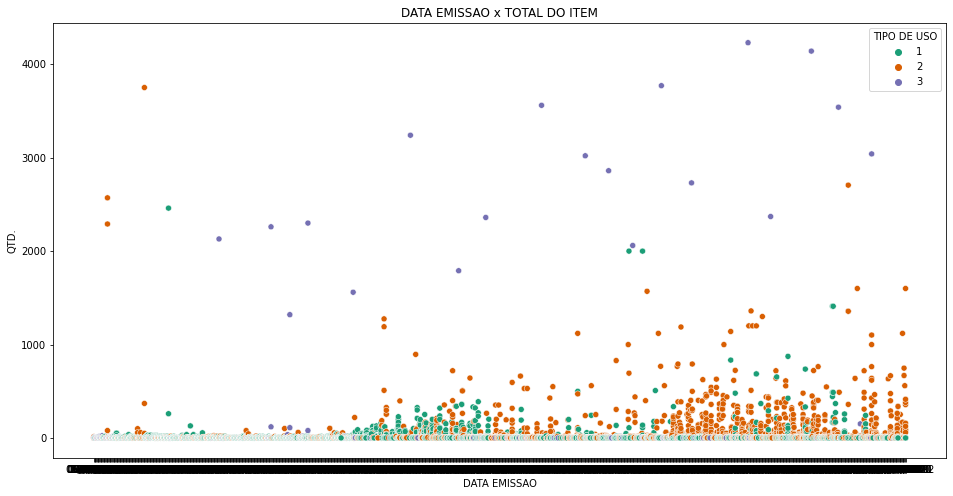

In [354]:
plt.figure(figsize=(16,8))
plt.title('DATA EMISSAO x Quantidade')
sns.scatterplot(x='DATA EMISSAO', y='QTD.',hue='TIPO DE USO',data=grossDF,palette='Dark2')
plt.show()

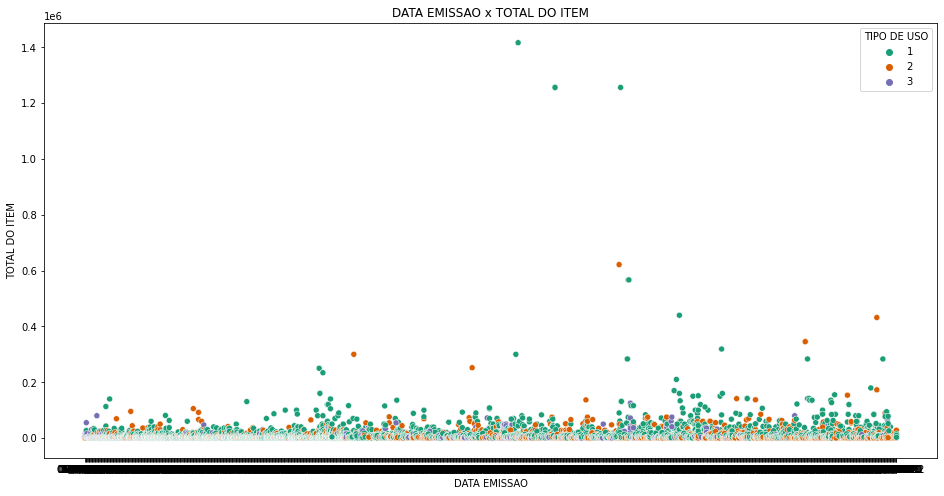

In [355]:
plt.figure(figsize=(16,8))
plt.title('DATA EMISSAO x TOTAL DO ITEM')
sns.scatterplot(x='DATA EMISSAO', y='TOTAL DO ITEM',hue='TIPO DE USO',data=grossDF,palette='Dark2')
plt.show()

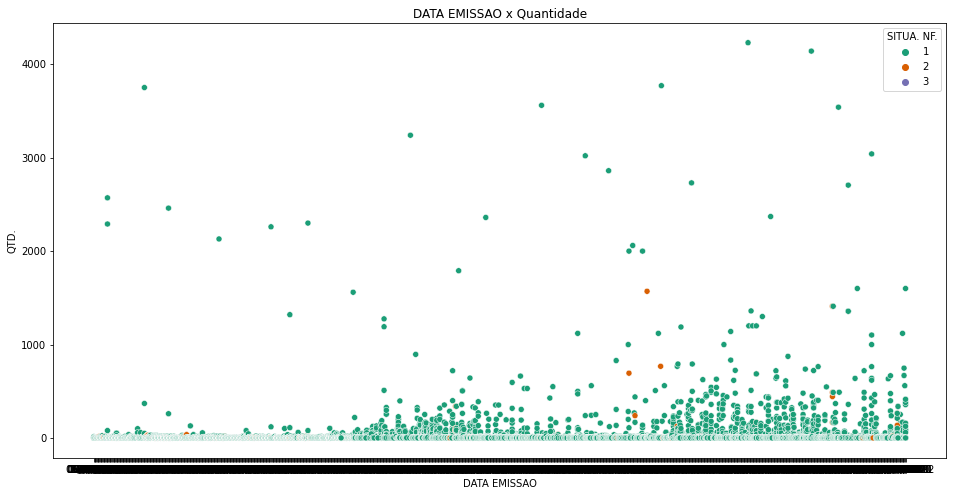

In [411]:
plt.figure(figsize=(16,8))
plt.title('DATA EMISSAO x Quantidade')
sns.scatterplot(x='DATA EMISSAO', y='QTD.',hue='SITUA. NF.',data=grossDF,palette='Dark2')
plt.show()

Conversões de data

In [356]:
grossDF['DATA EMISSAO'] =  pd.to_datetime(grossDF['DATA EMISSAO'], format='%d/%m/%Y')

In [357]:
mainDF = grossDF[['CÓD. MAT','DATA EMISSAO','QTD.','PRECO UNIT.','PRECO CUSTO','TOTAL DO ITEM']]

In [358]:
#testDF

Aqui trabalharemos com um DataFrame com apenas um item, para isso usaremos como critério de escolha o item com maior frequência.

In [359]:
mainDF['CÓD. MAT'].value_counts()
#Item com maior frequência aparece no topo da lista

3963     654
2180     644
5403     610
5241     596
5242     589
        ... 
1677       1
7821       1
10451      1
5634       1
9980       1
Name: CÓD. MAT, Length: 3024, dtype: int64

In [360]:
item = mainDF['CÓD. MAT'].value_counts().index.tolist()[0]
#Pegamos o item no topo da lista

In [361]:
itemDF = mainDF[(mainDF['CÓD. MAT'] == item)].reset_index()

In [362]:
itemDF

,index,CÓD. MAT,DATA EMISSAO,QTD.,PRECO UNIT.,PRECO CUSTO,TOTAL DO ITEM
0,64,3963,2017-10-17,2.0,55.00,11.000,110.00
1,88,3963,2017-10-18,1.0,55.00,11.000,55.00
2,120,3963,2017-10-19,1.0,50.60,11.000,50.60
3,150,3963,2017-10-19,2.0,55.00,11.000,110.00
4,211,3963,2017-10-25,1.0,52.25,11.000,52.25
...,...,...,...,...,...,...,...
649,34978,3963,2020-01-15,1.0,52.29,6.521,52.29
650,35139,3963,2020-02-04,8.0,1.00,6.521,8.00
651,35168,3963,2020-02-05,4.0,1.00,6.521,4.00
652,35187,3963,2020-02-05,10.0,1.00,6.521,10.00


In [363]:
print(mainDF['DATA EMISSAO'].min())
print(mainDF['DATA EMISSAO'].max())

2017-10-03 00:00:00
2022-04-19 00:00:00


In [364]:
mainDF = mainDF.groupby(pd.Grouper(key='DATA EMISSAO', freq='3M'), dropna=True).sum().reset_index()

In [365]:
itemDF =itemDF.groupby(pd.Grouper(key='DATA EMISSAO', freq='3M'), dropna=True).sum().reset_index()

In [366]:
itemDF = itemDF.drop(columns=['CÓD. MAT','PRECO UNIT.','PRECO CUSTO'], axis=1)

In [367]:
itemDF

,DATA EMISSAO,index,QTD.,TOTAL DO ITEM
0,2017-10-31,633,7.0,377.85
1,2018-01-31,12069,19.0,861.55
2,2018-04-30,306161,146.0,7543.12
3,2018-07-31,248316,44.0,2295.54
4,2018-10-31,95889,15.0,907.83
5,2019-01-31,184622,34.0,1663.01
6,2019-04-30,698407,98.0,5579.16
7,2019-07-31,284606,25.0,1438.08
8,2019-10-31,293929,26.0,1277.94
9,2020-01-31,643804,45.0,2230.00


In [368]:
mainDF

,DATA EMISSAO,CÓD. MAT,QTD.,PRECO UNIT.,PRECO CUSTO,TOTAL DO ITEM
0,2017-10-31,1179511,706.500,6.090618e+05,45954.9371,801463.45
1,2018-01-31,4957119,12012.490,2.016953e+06,189144.3481,2471644.04
2,2018-04-30,17240021,14793.470,4.119153e+06,408412.1689,4500077.23
3,2018-07-31,7757540,6465.283,2.645968e+06,257545.5654,3040731.08
4,2018-10-31,5348068,5105.300,2.429599e+06,221720.8428,2870384.79
5,2019-01-31,5521169,6989.810,2.400322e+06,191447.7324,2683605.88
6,2019-04-30,14626613,12846.620,6.034668e+06,302458.9075,8343318.81
7,2019-07-31,7919940,18877.170,2.906296e+06,235660.8487,3487397.08
8,2019-10-31,8446994,23523.078,3.064507e+06,411865.5113,3818359.92
9,2020-01-31,7930930,17471.874,2.730206e+06,408179.6375,3778466.03


In [369]:
mainDF['CÓD. MAT'].value_counts()

1179511     1
17908896    1
7948668     1
12295224    1
10851443    1
21990816    1
9366836     1
7701652     1
8009323     1
7930930     1
4957119     1
8446994     1
7919940     1
14626613    1
5521169     1
5348068     1
7757540     1
17240021    1
15584914    1
Name: CÓD. MAT, dtype: int64

**Transformamos o campo de data para um formato em que o Machine Learning possa entender.**

In [370]:
itemDF['DATA EMISSAO']=itemDF['DATA EMISSAO'].map(dt.datetime.toordinal)
mainDF['DATA EMISSAO']=mainDF['DATA EMISSAO'].map(dt.datetime.toordinal)

Correlação entre o DataFrame principal

In [371]:
#sns.pairplot(mainDF)

Correlação entre o DataFrame de item

In [372]:
#sns.pairplot(itemDF)

In [373]:
#sns.pairplot(grossDF)

In [374]:

#sns.jointplot(x='DATA EMISSAO',y='QTD.',data=itemDF,kind='scatter')

In [375]:
#sns.relplot(x="DATA EMISSAO", y="QTD.", size="QTD.",
  #          sizes=(40, 400), alpha=.5, palette="muted",
  #          height=10, data=itemDF)

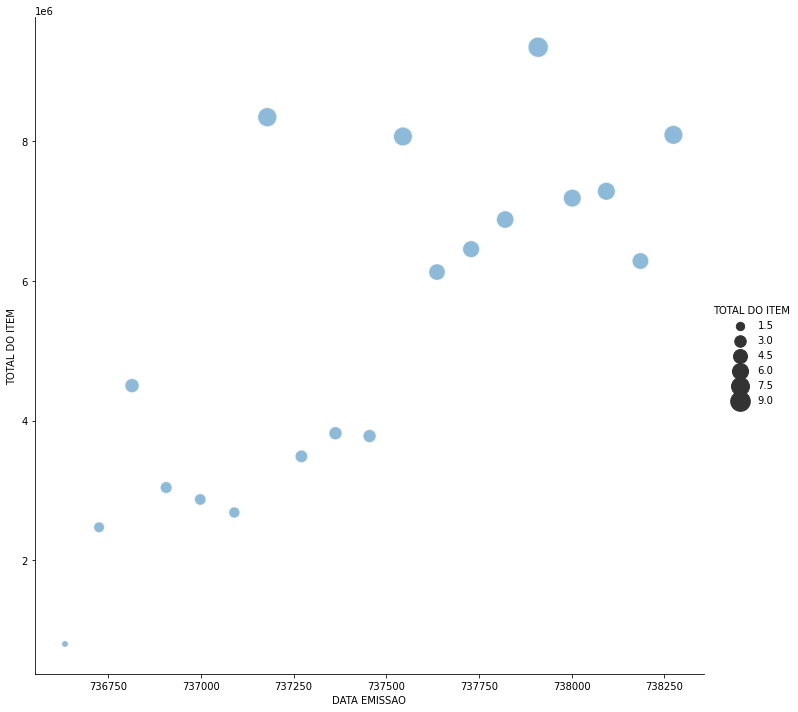

In [376]:
sns.relplot(x="DATA EMISSAO", y="TOTAL DO ITEM", size="TOTAL DO ITEM",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=10, data=mainDF)

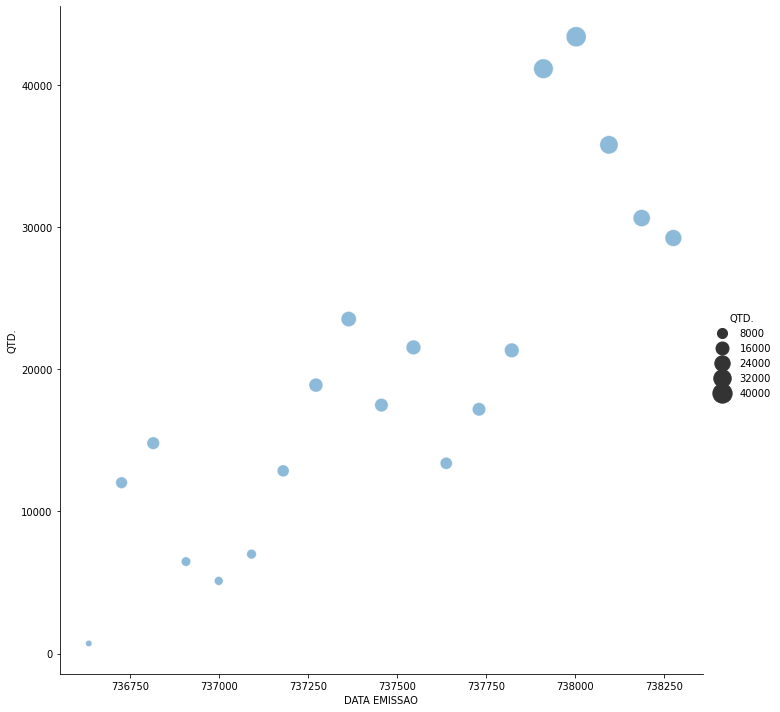

In [377]:
sns.relplot(x="DATA EMISSAO", y="QTD.", size="QTD.",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=10, data=mainDF)

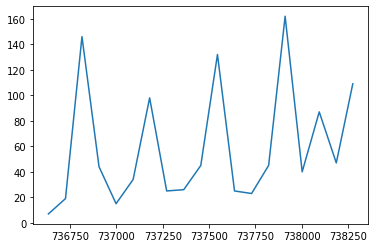

In [378]:
fig, ax = plt.subplots()
ax.plot(itemDF['DATA EMISSAO'], itemDF['QTD.'])

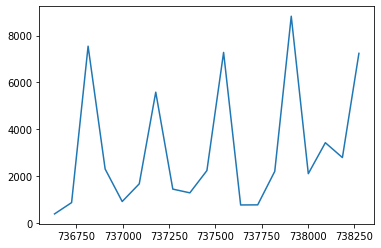

In [379]:
fig, ax = plt.subplots()
ax.plot(itemDF['DATA EMISSAO'], itemDF['TOTAL DO ITEM'])

In [380]:
itemDF.head(10)

,DATA EMISSAO,index,QTD.,TOTAL DO ITEM
0,736633,633,7.0,377.85
1,736725,12069,19.0,861.55
2,736814,306161,146.0,7543.12
3,736906,248316,44.0,2295.54
4,736998,95889,15.0,907.83
5,737090,184622,34.0,1663.01
6,737179,698407,98.0,5579.16
7,737271,284606,25.0,1438.08
8,737363,293929,26.0,1277.94
9,737455,643804,45.0,2230.00


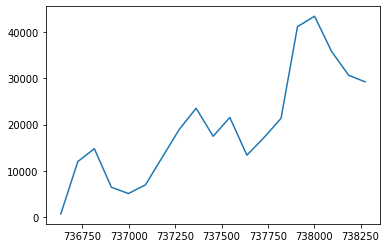

In [381]:
fig, ax = plt.subplots()
ax.plot(mainDF['DATA EMISSAO'], mainDF['QTD.'])

In [382]:
mainDF['DATA EMISSAO'].min()

736633

In [383]:
#mainDF.drop(mainDF[mainDF['DATA EMISSAO'] < 700000].index, inplace=True)

In [384]:
mainDF

,DATA EMISSAO,CÓD. MAT,QTD.,PRECO UNIT.,PRECO CUSTO,TOTAL DO ITEM
0,736633,1179511,706.500,6.090618e+05,45954.9371,801463.45
1,736725,4957119,12012.490,2.016953e+06,189144.3481,2471644.04
2,736814,17240021,14793.470,4.119153e+06,408412.1689,4500077.23
3,736906,7757540,6465.283,2.645968e+06,257545.5654,3040731.08
4,736998,5348068,5105.300,2.429599e+06,221720.8428,2870384.79
5,737090,5521169,6989.810,2.400322e+06,191447.7324,2683605.88
6,737179,14626613,12846.620,6.034668e+06,302458.9075,8343318.81
7,737271,7919940,18877.170,2.906296e+06,235660.8487,3487397.08
8,737363,8446994,23523.078,3.064507e+06,411865.5113,3818359.92
9,737455,7930930,17471.874,2.730206e+06,408179.6375,3778466.03


Data de emissão x Total das vendas

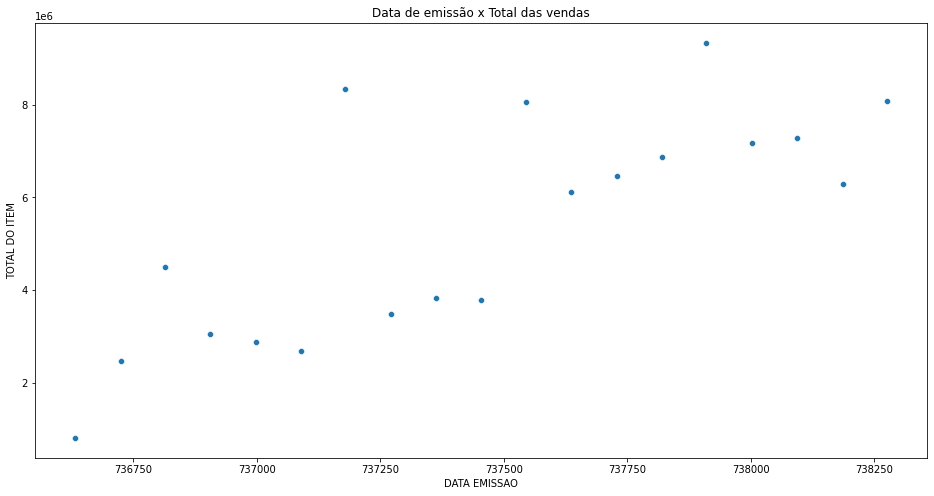

In [385]:
plt.figure(figsize=(16,8))
plt.title('Data de emissão x Total das vendas')
sns.scatterplot(x='DATA EMISSAO', y='TOTAL DO ITEM',data=mainDF,palette='Dark2')
plt.show()

Data de emissão x Quantidade de vendas

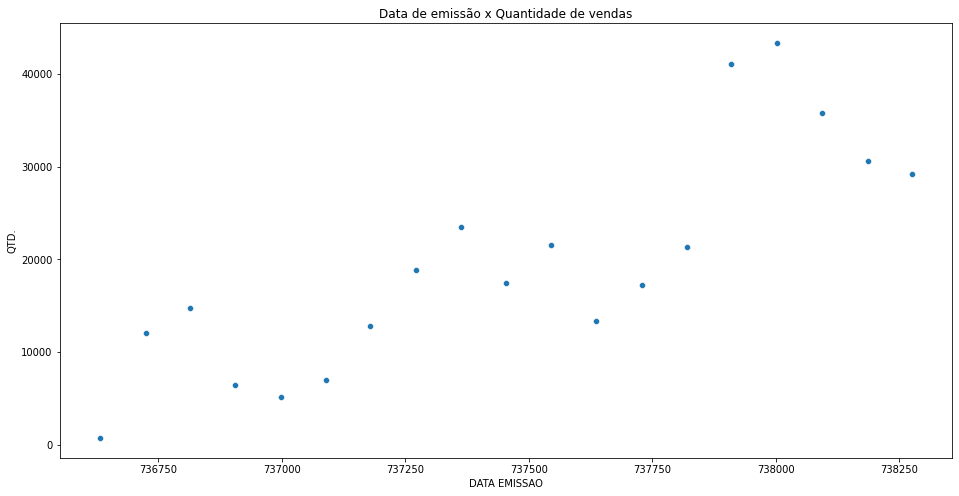

In [386]:
plt.figure(figsize=(16,8))
plt.title('Data de emissão x Quantidade de vendas')
sns.scatterplot(x='DATA EMISSAO', y='QTD.',data=mainDF,palette='Dark2')
plt.show()

In [387]:
#mainDF.drop(mainDF[mainDF['TOTAL DO ITEM'] > 200000].index, inplace=True)

DATA EMISSAO x TOTAL DO ITEM (item)

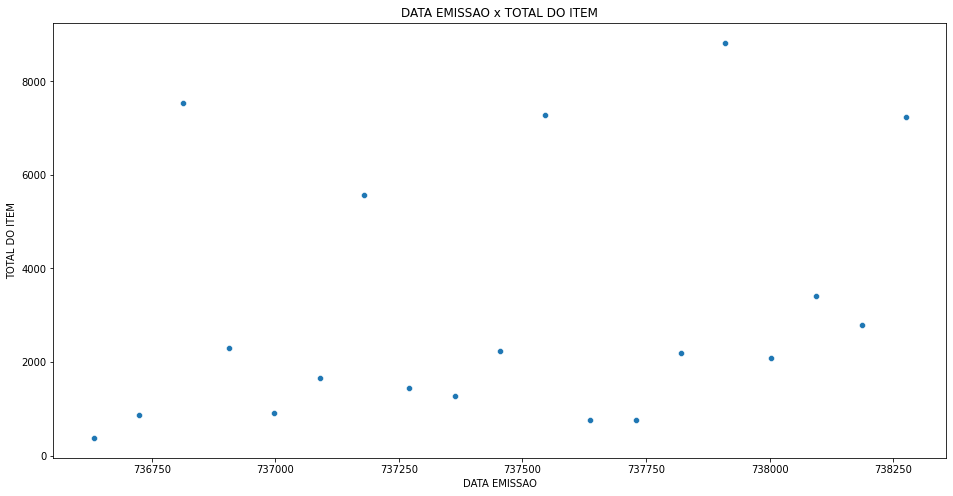

In [388]:
plt.figure(figsize=(16,8))
plt.title('DATA EMISSAO x TOTAL DO ITEM')
sns.scatterplot(x='DATA EMISSAO', y='TOTAL DO ITEM',data=itemDF,palette='Dark2')
plt.show()

Data emissão x Quantidade (Item)

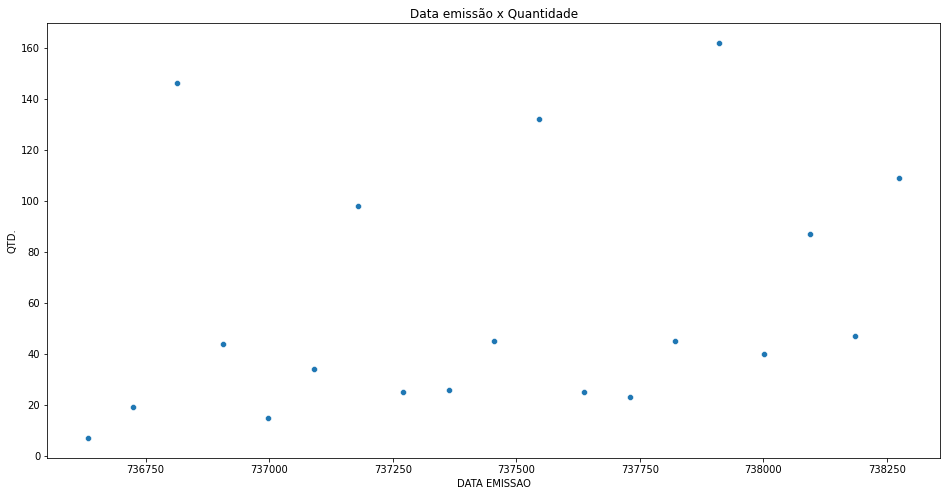

In [389]:
plt.figure(figsize=(16,8))
plt.title('Data emissão x Quantidade')
sns.scatterplot(x='DATA EMISSAO', y='QTD.',data=itemDF,palette='Dark2')
plt.show()

In [390]:
#itemDF.drop(itemDF[itemDF['TOTAL DO ITEM'] > 8000].index, inplace=True)

Normalização

DATA EMISSAO	index	QTD.	TOTAL DO ITEM

In [391]:
itemDF = itemDF.drop(columns=['index'], axis=1)

In [392]:
itemDF

,DATA EMISSAO,QTD.,TOTAL DO ITEM
0,736633,7.0,377.85
1,736725,19.0,861.55
2,736814,146.0,7543.12
3,736906,44.0,2295.54
4,736998,15.0,907.83
5,737090,34.0,1663.01
6,737179,98.0,5579.16
7,737271,25.0,1438.08
8,737363,26.0,1277.94
9,737455,45.0,2230.00


In [393]:
from sklearn import preprocessing

Normalização do DataFrame do item

In [394]:
#d = preprocessing.normalize(itemDF)
#itemDF = pd.DataFrame(d)

#itemDF = itemDF.rename(columns={0: 'DATA EMISSAO',1: 'QTD.',2: 'TOTAL DO ITEM'})
#itemDF

Plot após normalizar

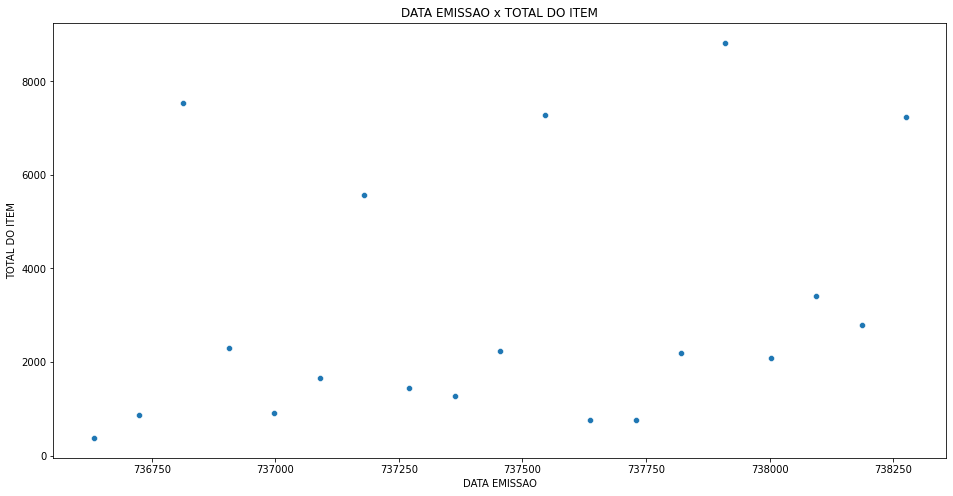

In [395]:
plt.figure(figsize=(16,8))
plt.title('DATA EMISSAO x TOTAL DO ITEM')
sns.scatterplot(x='DATA EMISSAO', y='TOTAL DO ITEM',data=itemDF,palette='Dark2')
plt.show()

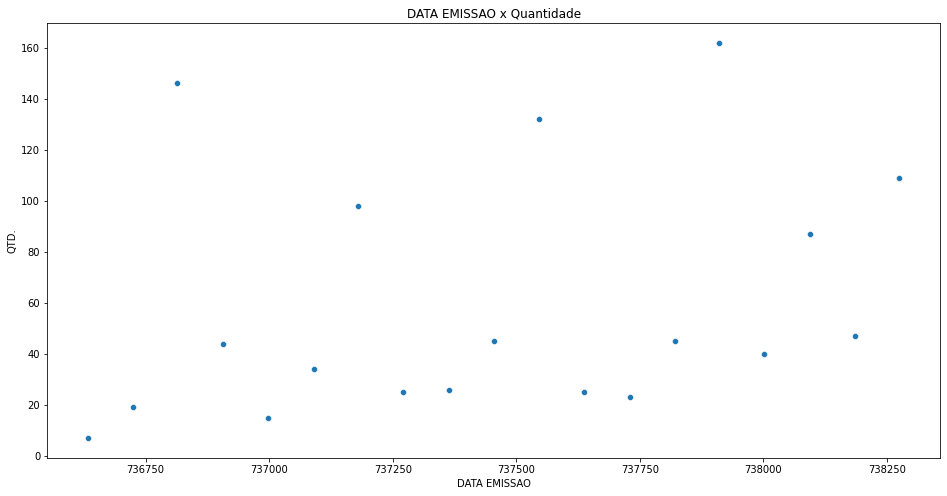

In [396]:
plt.figure(figsize=(16,8))
plt.title('DATA EMISSAO x Quantidade')
sns.scatterplot(x='DATA EMISSAO', y='QTD.',data=itemDF,palette='Dark2')
plt.show()

In [397]:
#scaled_features = scaler.transform(itemDF.drop('TOTAL DO ITEM',axis=1))

In [398]:
#df_feat = pd.DataFrame(scaled_features,columns=itemDF.columns[:-1])
#df_feat.head()


Normalização do DataFrame principal

In [399]:
#d = preprocessing.normalize(mainDF)
#mainDF = pd.DataFrame(d)
#mainDF = mainDF.rename(columns={0: 'DATA EMISSAO',1: 'CÓD. MAT',2: 'QTD.',3: 'PRECO UNIT.',4:'PRECO CUSTO',5:'TOTAL DO ITEM'})
#mainDF

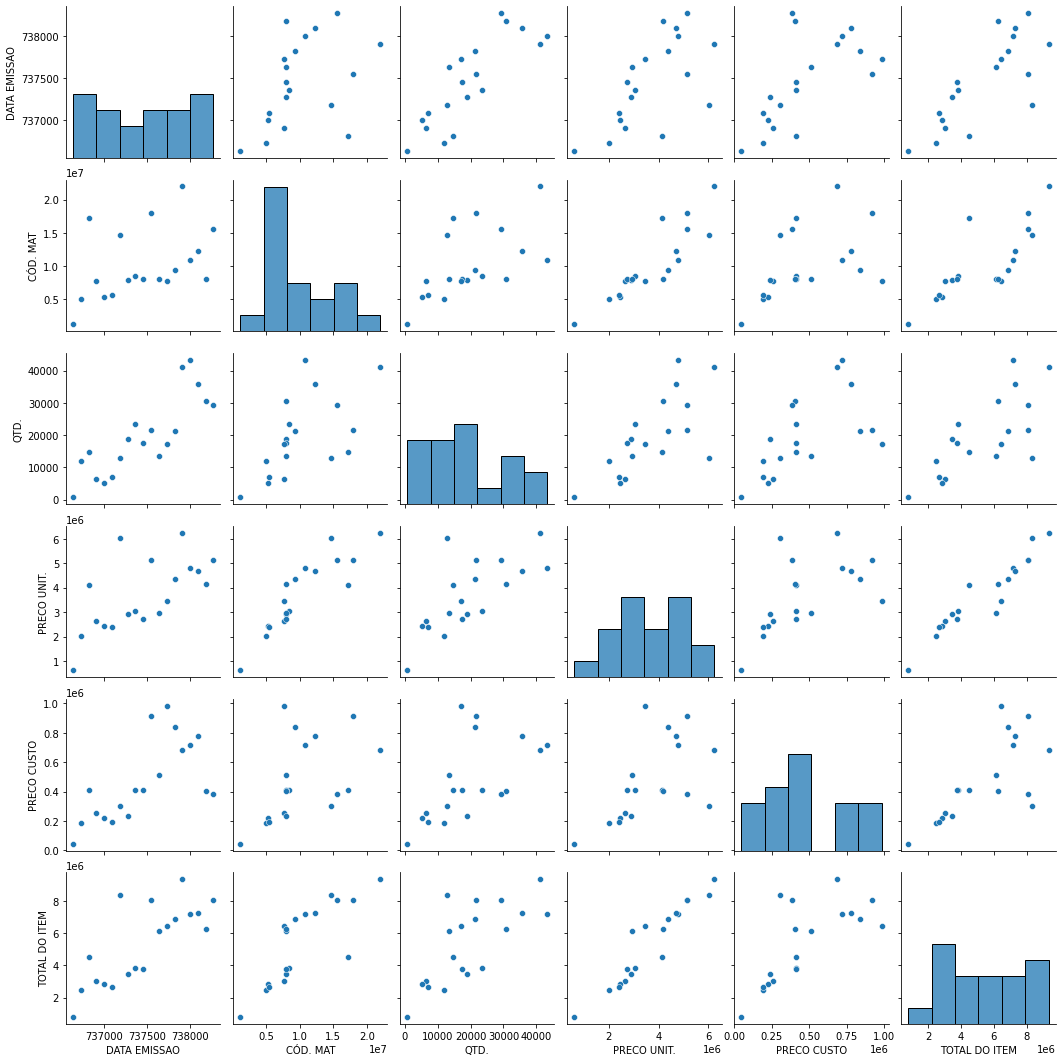

In [400]:
sns.pairplot(mainDF)

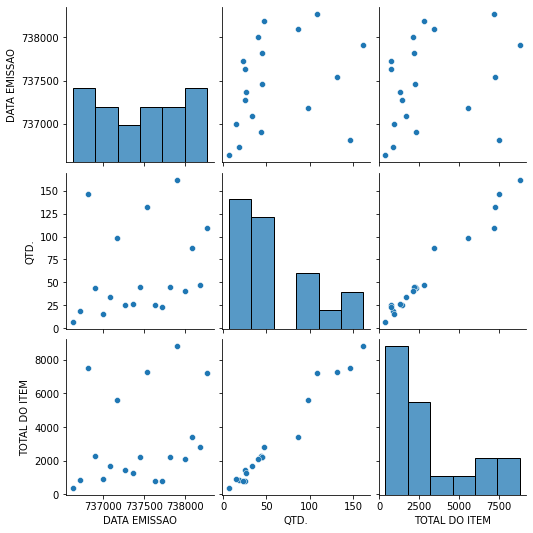

In [401]:
sns.pairplot(itemDF)